# 안녕하세요^^ 
## AIVLE 미니프로젝트 '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 실제 사례와 데이터를 기반으로 문제를 해결하는 전체 과정을 자기 주도형 실습으로 진행해볼 예정입니다.
* 앞선 교육과정을 정리하는 마음과 지금까지 배운 내용을 바탕으로 문제 해결을 해볼게요!
* 미니 프로젝트를 통한 문제 해결 과정 'A에서 Z까지', 지금부터 시작합니다!

## 개인과제
* 데이터 구조, 분포 확인, 전처리 : 1.1_버스정류장데이터 / 1.2 유동인구데이터 / 1.3_주민등록데이터 / 1.4_업종등록데이터
* 데이터간 관계 가설 수립 및 검증 : 1.5_데이터 분석

---

# 데이터 분석부터 먼저 시작해보겠습니다.
## "구별 업종 등록 데이터" 를 확인해 보도록 하겠습니다

In [47]:
# 필요 라이브러리부터 설치합니다.
# %pip install pandas seaborn

## 기본전제
* 처음에 제공되는 기본/추가 데이터는 'raw_data' 폴더에 있습니다.

[기본 데이터]
* business_type.csv

[데이터 소개]
* 서울 시 구별 등록 업종 상위 10개 데이터
    * 택시운송업
    * 한식일반음식점업
    * 용달 화물자동차 운송업
    * 부동산 중개 및 대리업
    * 두발미용업
    * 커피전문점
    * 남녀용 겉옷 및 셔츠 도매업
    * 기타주점업
    * 일반 교과 학원
    * 한식 육류요리 전문점

[변수 소개]
* 다수 업종 상위 1~10

---

# 1.데이터 불러오기
## 모든 미니 프로젝트의 시작은 '데이터 불러오기' 부터라고 할 수 있습니다.
+ KeyPoint : 불러오고자 하는 데이터에 따라 자유롭게 변수로 지정할 수 있다.

###  데이터 프레임을 불러오고 변수로 저장(여기서는 CSV 기준으로 진행)
* csv : pd.read_csv("파일이름. csv")
* txt : pd.read_csv("파일이름. csv", sep="구분자")
* xlsx : pd.read_excel('파일이름.xlsx')
* pickle : pd.read_pickle("파일이름.pkl") <br>
 [참고] pickle은 파이썬의 모든 객체를 파일로 저장할 수 있는 방법으로 DataFrame,List,Dict 등 모든 객체 저장 가능(특히 sklearn라이브러리를 통해 모델을 학습시키고, 저장할 때 많이 사용)

## 기본전제
* 처음에 제공되는 데이터는 'raw_data' 폴더에 있습니다.

[기본 데이터]
* 1.4 business_type.csv

[데이터 소개]
* 서울시 업종 등록 데이터

#### [실습문제1] 데이터 로딩
* '1.4 business_type.csv'파일을 'seoul_business' 변수에 저장하고 그 데이터를 확인하세요.
    * 데이터 파일 로딩시 참고 사항 
        * 구분자(sep)는 ',' 입니다
        * UTF-8 인코더를 사용해 주세요

In [48]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
import pandas as pd
seoul_business = pd.read_csv('1.4 business_type.csv')

In [49]:
# 데이터 프레임의 Shape을 확인합니다.
seoul_business.shape

(451, 22)

---

# 2.기본 정보 확인 및 클렌징

+ 데이터 클렌징 : 결측치, 이상치 등을 제거하여 데이터 분석 결과가 왜곡 되는 문제를 방지하기 위한 정제 과정

#### [실습문제2] 기본 정보 확인하기
* 'seoul_moving' 데이터의 정보를 확인해보세요.
* 'describe', 'info', 'head' 등 전부 활용해 보겠습니다.

In [50]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_business.head()


,자치구,동,다수업종 상위10,다수업종 상위10.1,다수업종 상위10.2,다수업종 상위10.3,다수업종 상위10.4,다수업종 상위10.5,다수업종 상위10.6,다수업종 상위10.7,...,다수업종 상위10.10,다수업종 상위10.11,다수업종 상위10.12,다수업종 상위10.13,다수업종 상위10.14,다수업종 상위10.15,다수업종 상위10.16,다수업종 상위10.17,다수업종 상위10.18,다수업종 상위10.19
0,자치구,동,택시운송업,택시운송업,한식 일반 음식점업,한식 일반 음식점업,용달 화물자동차 운송업,용달 화물자동차 운송업,부동산 중개 및 대리업,부동산 중개 및 대리업,...,커피전문점,커피전문점,남녀용 겉옷 및 셔츠 도매업,남녀용 겉옷 및 셔츠 도매업,기타주점업,기타주점업,일반 교과 학원,일반 교과 학원,한식 육류요리 전문점,한식 육류요리 전문점
1,자치구,동,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,...,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수
2,합계,합계,"47,176","76,701","29,225","100,183","28,494","29,356","24,013","42,636",...,"16,255","57,322","13,388","51,116","13,339","31,371","11,911","50,773","11,109","44,653"
3,종로구,소계,215,215,"1,548","5,912",618,646,549,889,...,948,"3,613",400,962,537,"1,413",110,382,437,"1,982"
4,종로구,사직동,7,7,230,982,12,12,57,96,...,124,525,2,18,74,177,9,34,45,220


In [51]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

seoul_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451 entries, 0 to 450
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   자치구           451 non-null    object
 1   동             451 non-null    object
 2   다수업종 상위10     451 non-null    object
 3   다수업종 상위10.1   451 non-null    object
 4   다수업종 상위10.2   451 non-null    object
 5   다수업종 상위10.3   451 non-null    object
 6   다수업종 상위10.4   451 non-null    object
 7   다수업종 상위10.5   451 non-null    object
 8   다수업종 상위10.6   451 non-null    object
 9   다수업종 상위10.7   451 non-null    object
 10  다수업종 상위10.8   451 non-null    object
 11  다수업종 상위10.9   451 non-null    object
 12  다수업종 상위10.10  451 non-null    object
 13  다수업종 상위10.11  451 non-null    object
 14  다수업종 상위10.12  451 non-null    object
 15  다수업종 상위10.13  451 non-null    object
 16  다수업종 상위10.14  451 non-null    object
 17  다수업종 상위10.15  451 non-null    object
 18  다수업종 상위10.16  451 non-null    object
 19  다수업종 상위1

#### [실습문제3] 데이터 확인 및 처리

* 데이터를 보았을때, 어느 데이터를 가져와야 할지 생각 해 봅시다.

In [52]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_business.head()

,자치구,동,다수업종 상위10,다수업종 상위10.1,다수업종 상위10.2,다수업종 상위10.3,다수업종 상위10.4,다수업종 상위10.5,다수업종 상위10.6,다수업종 상위10.7,...,다수업종 상위10.10,다수업종 상위10.11,다수업종 상위10.12,다수업종 상위10.13,다수업종 상위10.14,다수업종 상위10.15,다수업종 상위10.16,다수업종 상위10.17,다수업종 상위10.18,다수업종 상위10.19
0,자치구,동,택시운송업,택시운송업,한식 일반 음식점업,한식 일반 음식점업,용달 화물자동차 운송업,용달 화물자동차 운송업,부동산 중개 및 대리업,부동산 중개 및 대리업,...,커피전문점,커피전문점,남녀용 겉옷 및 셔츠 도매업,남녀용 겉옷 및 셔츠 도매업,기타주점업,기타주점업,일반 교과 학원,일반 교과 학원,한식 육류요리 전문점,한식 육류요리 전문점
1,자치구,동,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,...,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수
2,합계,합계,"47,176","76,701","29,225","100,183","28,494","29,356","24,013","42,636",...,"16,255","57,322","13,388","51,116","13,339","31,371","11,911","50,773","11,109","44,653"
3,종로구,소계,215,215,"1,548","5,912",618,646,549,889,...,948,"3,613",400,962,537,"1,413",110,382,437,"1,982"
4,종로구,사직동,7,7,230,982,12,12,57,96,...,124,525,2,18,74,177,9,34,45,220


In [53]:
seoul_business.tail()

,자치구,동,다수업종 상위10,다수업종 상위10.1,다수업종 상위10.2,다수업종 상위10.3,다수업종 상위10.4,다수업종 상위10.5,다수업종 상위10.6,다수업종 상위10.7,...,다수업종 상위10.10,다수업종 상위10.11,다수업종 상위10.12,다수업종 상위10.13,다수업종 상위10.14,다수업종 상위10.15,다수업종 상위10.16,다수업종 상위10.17,다수업종 상위10.18,다수업종 상위10.19
446,강동구,성내3동,120,120,135,390,73,73,104,163,...,54,133,10,86,57,103,66,199,44,164
447,강동구,둔촌2동,117,436,63,249,89,89,61,108,...,34,85,10,788,21,39,35,90,24,101
448,강동구,암사1동,209,372,71,195,153,153,67,107,...,29,59,3,6,47,98,31,67,34,98
449,강동구,천호2동,157,187,152,509,144,151,97,188,...,63,212,4,17,95,268,24,42,69,245
450,강동구,길동,"1,441","1,557",152,436,217,225,146,237,...,71,228,6,126,122,294,39,136,70,224


In [54]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 1행에 있는 값으로 column명 지정하기 위해 값 추출
seoul_business[0:1].values

array([['자치구', '동', '택시운송업', '택시운송업', '한식 일반 음식점업', '한식 일반 음식점업',
        '용달 화물자동차 운송업', '용달 화물자동차 운송업', '부동산 중개 및 대리업', '부동산 중개 및 대리업',
        '두발미용업', '두발미용업', '커피전문점', '커피전문점', '남녀용 겉옷 및 셔츠 도매업',
        '남녀용 겉옷 및 셔츠 도매업', '기타주점업', '기타주점업', '일반 교과 학원', '일반 교과 학원',
        '한식 육류요리 전문점', '한식 육류요리 전문점']], dtype=object)

In [55]:
# 각 column명에 사업체수, 종업자수 작성 및 column명으로 지정
seoul_business.columns = ['자치구', '동', '택시운송업 사업체수', '택시운송업 종업자수', '한식 일반 음식점업 사업체수', '한식 일반 음식점업 종업자수',
        '용달 화물자동차 운송업 사업체수', '용달 화물자동차 운송업 종업자수', '부동산 중개 및 대리업 사업체수', '부동산 중개 및 대리업 종업자수',
        '두발미용업 사업체수', '두발미용업 종업자수', '커피전문점 사업체수', '커피전문점 종업자수', '남녀용 겉옷 및 셔츠 도매업 사업체수',
        '남녀용 겉옷 및 셔츠 도매업 종업자수', '기타주점업 사업체수', '기타주점업 종업자수', '일반 교과 학원 사업체수', '일반 교과 학원 종업자수',
        '한식 육류요리 전문점 사업체수', '한식 육류요리 전문점 종업자수']

In [56]:
# 컬럼 선택
column_list = ['자치구', '동', '커피전문점 사업체수', '커피전문점 종업자수', '부동산 중개 및 대리업 종업자수']
seoul_business = seoul_business[column_list]

In [57]:
# 3번째 행 부터 데이터 사용
seoul_business = seoul_business[3:]

In [58]:
# 구별로 소계 삭제
seoul_business = seoul_business.loc[seoul_business['동'] != '소계']

In [59]:
# 동 단위는 해당 프로젝트에서 사용하지 않음으로 삭제 (구 단위로 진행)
seoul_business.drop('동', axis=1, inplace=True)

In [60]:
# 자치구 컬럼 제외 나머지 object에서 숫자형 data type으로 변경
seoul_business.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423 entries, 4 to 450
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   자치구                423 non-null    object
 1   커피전문점 사업체수         423 non-null    object
 2   커피전문점 종업자수         423 non-null    object
 3   부동산 중개 및 대리업 종업자수  423 non-null    object
dtypes: object(4)
memory usage: 16.5+ KB


In [61]:
# 값에 '-' 존재 => 제거
# 분명 제거 했는데, 데이터의 개수가 왜 그대로인지는 모르겠음. 확인해봐야함. (해당 코드 진행 후, datatype 변경은 잘 됨)
seoul_business.replace('-', None, inplace=True)
seoul_business.dropna(inplace=True)
for col in list(seoul_business)[1:]:
    seoul_business[col] = seoul_business[col].str.replace(',', '').astype('int')
seoul_business.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423 entries, 4 to 450
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   자치구                423 non-null    object
 1   커피전문점 사업체수         423 non-null    int32 
 2   커피전문점 종업자수         423 non-null    int32 
 3   부동산 중개 및 대리업 종업자수  423 non-null    int32 
dtypes: int32(3), object(1)
memory usage: 11.6+ KB


In [62]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_business.head()

,자치구,커피전문점 사업체수,커피전문점 종업자수,부동산 중개 및 대리업 종업자수
4,종로구,124,525,96
5,종로구,66,243,10
6,종로구,24,62,26
7,종로구,19,62,52
8,종로구,7,15,17


In [63]:
# 구가 여러개로 나누어져 있으므로, 합치기
seoul_business = seoul_business.groupby(['자치구'], as_index=False)[list(seoul_business)[1:]].sum()

In [64]:
seoul_business.head()

,자치구,커피전문점 사업체수,커피전문점 종업자수,부동산 중개 및 대리업 종업자수
0,강남구,1624,7273,6508
1,강동구,546,1660,1990
2,강북구,358,1095,867
3,강서구,690,2530,2352
4,관악구,581,2049,2136


In [65]:
# 해당 데이터프레임을 'df_seoul_business.csv' 파일로 저장하세요.
seoul_business.to_csv('df_seoul_business.csv', index=False)

---

# 3.데이터 분석하기
+ KeyPoint : 데이터의 형태를 살펴보고 다양한 분석기법을 통해 모델링에 적합하도록 정제요소를 선별할 수 있다.
  * 데이터들의 패턴 탐색
  * 변수들간의 관계 파악

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# 시각화 한글폰트 설정
# 맑은 고딕

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

# scipy
import scipy.stats as spst

#### [실습문제4] 데이터 분포 알아보기
* 다양한 변수를 기준으로 그래프를 그려보고 인사이트를 도출해보세요.

In [67]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_business

,자치구,커피전문점 사업체수,커피전문점 종업자수,부동산 중개 및 대리업 종업자수
0,강남구,1624,7273,6508
1,강동구,546,1660,1990
2,강북구,358,1095,867
3,강서구,690,2530,2352
4,관악구,581,2049,2136
5,광진구,590,1887,1313
6,구로구,421,1384,1213
7,금천구,383,1215,1381
8,노원구,535,1748,1053
9,도봉구,288,837,794


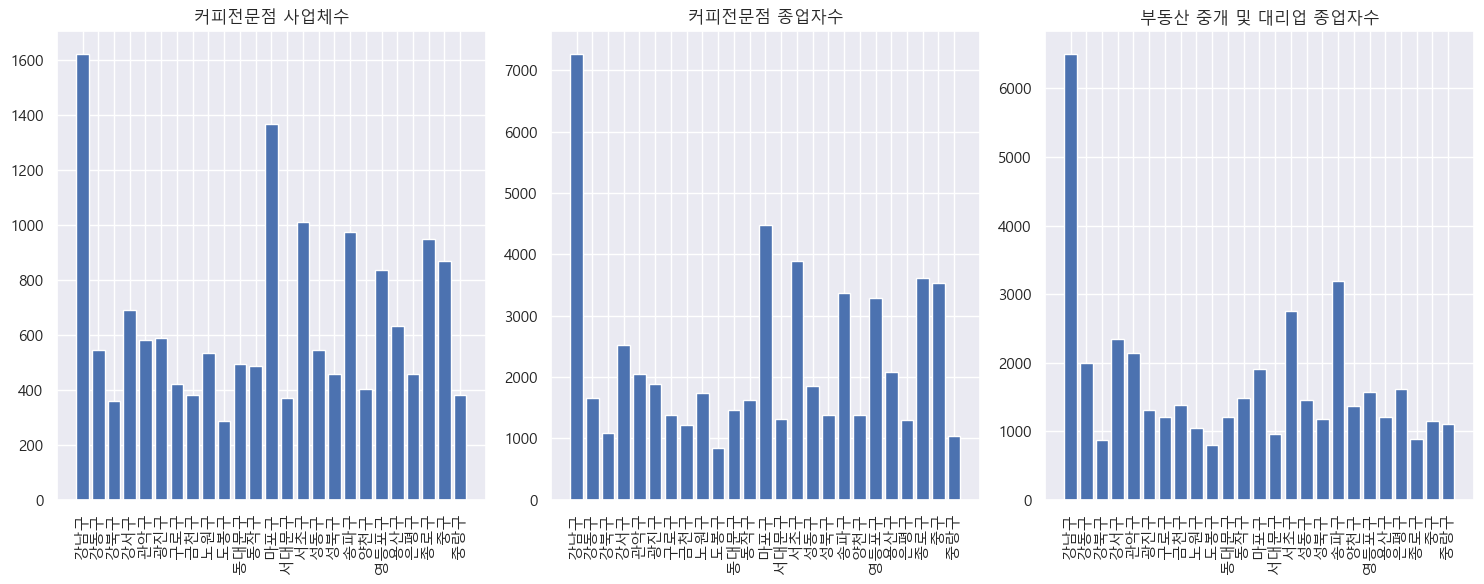

In [71]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

plt.figure(figsize=(15, 6))
for i in range(1, len(list(seoul_business))):
    plt.subplot(1, 3, i)
    plt.title(list(seoul_business)[i])
    plt.bar(seoul_business['자치구'], seoul_business[list(seoul_business)[i]])
    plt.xticks(rotation=90)
    
plt.tight_layout()
plt.show()

In [72]:
seoul_business.describe()

,커피전문점 사업체수,커피전문점 종업자수,부동산 중개 및 대리업 종업자수
count,25.000000,25.000000,25.00000
mean,650.200000,2292.880000,1705.44000
std,328.970237,1452.869383,1163.42057
min,288.000000,837.000000,794.00000
25%,421.000000,1375.000000,1152.00000
50%,546.000000,1748.000000,1364.00000
75%,838.000000,3295.000000,1903.00000
max,1624.000000,7273.000000,6508.00000


- 위 차트를 통해 알게된 사실을 정리해봅시다.
    1. 강남구에 모든 분야에서 월등히 종업자수가 많음. 
    2. 마포구에 기타주점업 종사자수가 많음. (강남구 다음으로 많음)

---